## Plotting options 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import sys
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9, inferno, viridis
from datashader.utils import export_image
from functools import partial
background = "black"

In [3]:
img_map = partial(export_image, export_path="clifford_maps", background=background)

### Clifford attractors

\begin{equation}
x_{n +1} = \sin(a y_{n}) + c \cos(a x_{n})\\
y_{n +1} = \sin(b x_{n}) + d \cos(b y_{n})
\end{equation}

#### Function definition

In [4]:
def clifford(a, b, c, d, x, y):
    return np.sin(a * y) + c * np.cos(a * x), np.sin(b * x) + d*np.cos(b * y)

In [5]:
def clifford_map(a, b, c, d, x0, y0, iterar):
    x, y = x0, y0
    x_list, y_list = [], []
    for i in range(iterar):
        x, y = clifford(a, b, c, d, x, y)
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

### Domain

In [15]:
x_list, y_list = clifford_map(-1.244, -1.251, -1.815, -1.908, 0, 0, 10000000)
d = {'r': x_list, 'x': y_list}
df1 = pd.DataFrame(d)

### Density `datashader`  plot 

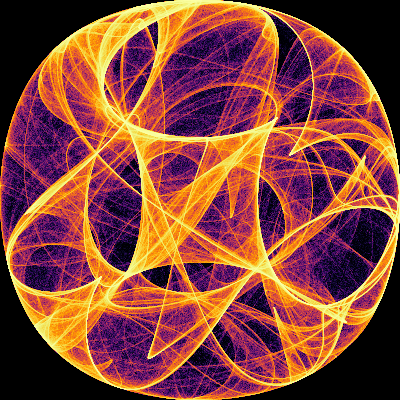

In [16]:
cvs1 = ds.Canvas(plot_width = 400, plot_height = 400,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='eq_hist')
img_map(img,"attractorHist")

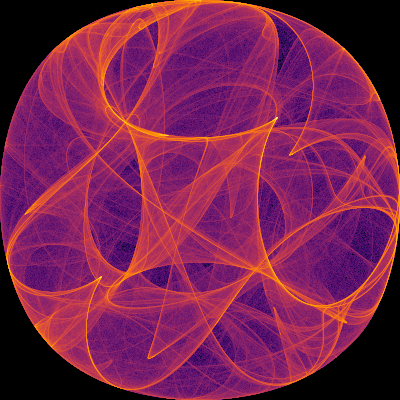

In [17]:
cvs1 = ds.Canvas(plot_width = 400, plot_height = 400,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='log')
img_map(img,"attractorLog")

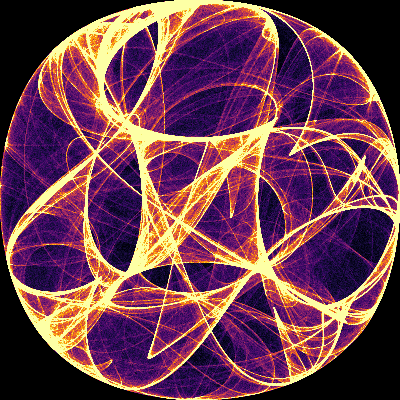

In [19]:
cvs1 = ds.Canvas(plot_width = 400, plot_height = 400,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = inferno, how='linear', span = [0,100])
img_map(img,"attractorLinear")

### My own cmap, black and white

In [20]:
black_white = ["#ffffff","#f0f0f0","#d9d9d9","#bdbdbd","#969696","#737373","#525252","#252525","#000000"]
img_map = partial(export_image, export_path="clifford_maps", background="white")

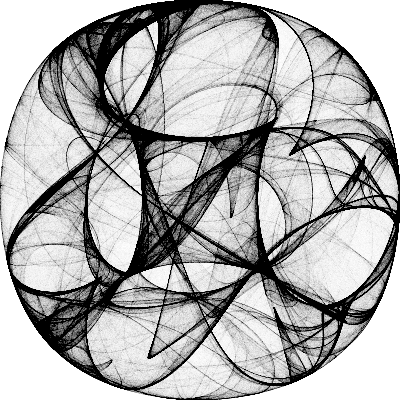

In [25]:
cvs1 = ds.Canvas(plot_width = 400, plot_height = 400,
                 x_range = (min(x_list), max(x_list)), y_range = (min(y_list), max(y_list)))
agg1 = cvs1.points(df1, 'r', 'x')
img = tf.shade(agg1, cmap = black_white, how='linear', span = [0,100])
img_map(img,"attractorLinearBW")

### Packages, version control

In [2]:
print(f"Python version: {sys.version}")
print(" ")
print("numpy == ", np.__version__)
print("matplotlib == ", mpl.__version__)
print("pandas == ", pd.__version__)
print("datashader == ", ds.__version__)

Python version: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
 
numpy ==  1.14.0
matplotlib ==  2.1.2
pandas ==  0.22.0
datashader ==  0.6.5
